## Portfolio Part 2

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the movielens dataset provided in Portfolio task 1. 

### Import Cleaned MovieLens Dataset
Save the cleaned data (i.e., after removing missing values and outliers) in the Portfolio task 1 as a csv file named 'movielens_data_clean.csv'. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'movielens_data_clean') and print out its total length.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
#import cleaned data set
movielens = pd.read_csv('files/movielens_data_clean.csv')

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between age/gender/genre/occupation and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, genre and occupation) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
movielens.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [5]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  object 
 3   occupation  96854 non-null  object 
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  object 
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.9+ MB


In [6]:
# convert categorical variables to numerical variables
movielens['gender'] =movielens['gender'].astype('category').cat.codes
movielens['occupation'] =movielens['occupation'].astype('category').cat.codes
movielens['genre'] =movielens['genre'].astype('category').cat.codes

In [7]:
#checking datatype after converting categorical variables to numerical variables
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  int8   
 3   occupation  96854 non-null  int8   
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  int8   
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), int8(3)
memory usage: 4.0 MB


In [8]:
# correlations between age/gender/genre/occupation and rating
movielens[['rating', 'age', 'gender', 'genre', 'occupation']].corr()

,rating,age,gender,genre,occupation
rating,1.000000,0.051724,-0.007239,0.045250,-0.033717
age,0.051724,1.000000,0.037126,0.027286,-0.370879
gender,-0.007239,0.037126,1.000000,-0.000509,0.012117
genre,0.045250,0.027286,-0.000509,1.000000,-0.011443
occupation,-0.033717,-0.370879,0.012117,-0.011443,1.000000


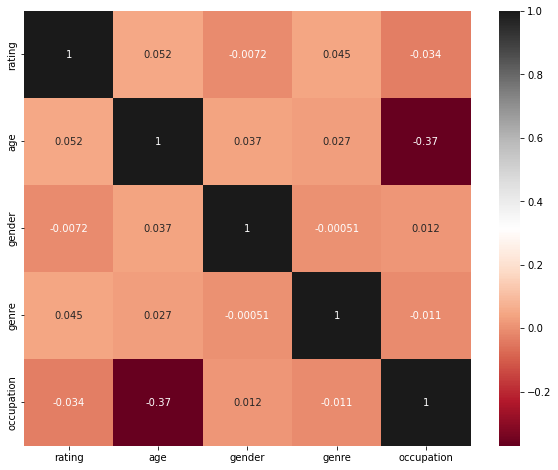

In [9]:
# plotting correlation heatmap
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(movielens[['rating', 'age', 'gender', 'genre', 'occupation']].corr(), cmap="RdGy", annot=True)
  
# displaying heatmap
plt.show()

#### Comment: 
* From the correlation matrix, we conclude that "age" and "genre" are the most two correlated features regarding "rating", whilst "gender" and "occupation" are the least two correlated features regarding "rating"

* Though "age" and "genre" are considered to be most correlated with 'rating', these two features' correlation with 'rating' is considerably not high in fact (only 0.052 and 0.045). However since these two features are the most correlated with "rating", therefore this duo is expected to be the most useful input features that will give smaller errors for our prediction.

* "gender" and "occupation" are expected not to have much impact on the prediction since this duo is the least correlated with "rating".

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [10]:
# Case 1: training data size = 10%, test data size = 90%
train_1, test_1 = train_test_split(movielens, test_size=0.9, random_state=142)
print(train_1.shape)
print(test_1.shape)

(9685, 8)
(87169, 8)


In [11]:
# Case 2: training data size = 90%, test data size = 10%
train_2, test_2 = train_test_split(movielens, test_size=0.1, random_state=142)
print(train_2.shape)
print(test_2.shape)

(87168, 8)
(9686, 8)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [12]:
lr = linear_model.LinearRegression()

most_correlated_features = ['age', 'genre']
least_correlated_features = ['gender', 'occupation']

#### model-a: using the training/testing data in case 1 with two most correlated input features

In [13]:
X_train_a = train_1[most_correlated_features]
y_train_a = train_1['rating']

X_test_a = test_1[most_correlated_features]
y_test_a = test_1['rating']

lr.fit(X_train_a, y_train_a)

LinearRegression()

#### model-b: using the training/testing data in case 1 with two least correlated input features

In [14]:
X_train_b = train_1[least_correlated_features]
y_train_b = train_1['rating']

X_test_b = test_1[least_correlated_features]
y_test_b = test_1['rating']

lr.fit(X_train_b, y_train_b)

LinearRegression()

#### model-c: using the training/testing data in case 2 with two most correlated input features

In [15]:
X_train_c = train_2[most_correlated_features]
y_train_c = train_2['rating']

X_test_c = test_2[most_correlated_features]
y_test_c = test_2['rating']

lr.fit(X_train_c, y_train_c)

LinearRegression()

#### model-d: using the training/testing data in case 2 with two least correlated input features

In [16]:
X_train_d = train_2[least_correlated_features]
y_train_d = train_2['rating']

X_test_d = test_2[least_correlated_features]
y_test_d = test_2['rating']

lr.fit(X_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

#### Evaluation: model-a 

In [17]:
predicted = lr.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted)**2).sum()/len(y_test_a)
rmse_a = np.sqrt(mse_a)
r2_a = r2_score(y_test_a, predicted)
print("MSE:", mse_a)
print("Root MSE:", rmse_a)
print("R Squared:", r2_a)

MSE: 1.5903827602972627
Root MSE: 1.2611037864891463
R Squared: -0.2753291355840566


#### Evaluation: model-b

In [18]:
predicted = lr.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted)**2).sum()/len(y_test_b)
rmse_b = np.sqrt(mse_b)
r2_b = r2_score(y_test_b, predicted)
print("MSE:", mse_b)
print("Root MSE:", rmse_b)
print("R Squared:", r2_b)

MSE: 1.2455770895802942
Root MSE: 1.1160542502854842
R Squared: 0.001170791953990391


#### Evaluation: model-c

In [19]:
predicted = lr.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted)**2).sum()/len(y_test_c)
rmse_c = np.sqrt(mse_c)
r2_c = r2_score(y_test_c, predicted)
print("MSE:", mse_c)
print("Root MSE:", rmse_c)
print("R Squared:", r2_c)

MSE: 1.572662263257254
Root MSE: 1.2540583173270907
R Squared: -0.2716137700034058


#### Evaluation: model-d

In [20]:
predicted = lr.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted)**2).sum()/len(y_test_d)
rmse_d = np.sqrt(mse_d)
r2_d = r2_score(y_test_d, predicted)
print("MSE:", mse_d)
print("Root MSE:", rmse_d)
print("R Squared:", r2_d)

MSE: 1.2357380214091604
Root MSE: 1.1116375404821306
R Squared: 0.0008144018881391935


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [21]:
models = {
    'Model': ['A', 'B', 'C', 'D'],
    'MSE': [mse_a, mse_b, mse_c, mse_d],
    
    'RMSE': [rmse_a, rmse_b, rmse_c, rmse_d],
    
    'R Squared': [r2_a, r2_b, r2_c, r2_d]
}

df = pd.DataFrame(models)
df

,Model,MSE,RMSE,R Squared
0,A,1.590383,1.261104,-0.275329
1,B,1.245577,1.116054,0.001171
2,C,1.572662,1.254058,-0.271614
3,D,1.235738,1.111638,0.000814


<AxesSubplot:title={'center':'MSE and RMSE Comparision across models'}, xlabel='Model'>

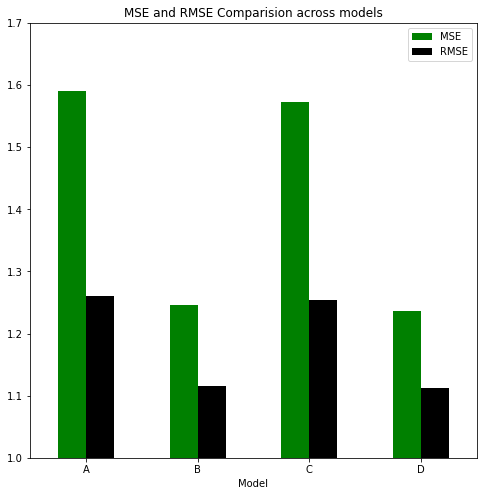

In [22]:
df.plot(kind='bar',x='Model', y=['MSE', 'RMSE'], figsize= (8,8), title = "MSE and RMSE Comparision across models", ylim = (1,1.7), color = ['green', 'black'], rot = 0)

#### Summary: 
* When compare the 2 cases:
    * Case 1: training data containing 10% of the entire data
    * Case 2: training data containing 90% of the entire data, we notice that the models perform better and give smaller errors when the training data contains 90% of the entire data (10% for test data).

* In addition, the errors (both MSE and RMSE) are significantly lower when we use the features that have the highest correlation with the target column. The higher the correlation, the smaller error of the model. 

* Although 'age' and 'genre' are seen to have the highest correlation with the target 'rating' comparing to other features, these two input features are fairly not a good indicator for our prediction since their correlation are not informative when putting in the range between -1 and 1